In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from seaborn import kdeplot
from joblib import dump

In [38]:
data = pd.read_csv("../data/loan_approval_dataset.csv")
data.columns = [x.lstrip() for x in data.columns]


numeric_cols = data.describe().columns.tolist()[
    1:
]  # do from 1: to exclude the loan_id column

In [39]:
categorical_dict = {
    "education": {" Graduate": 1, " Not Graduate": 0},

    "self_employed": {" Yes": 1, " No": 0},

    "loan_status": {" Approved": 1, " Rejected": 0},
}


data.replace(categorical_dict, inplace=True)

data.education = data.education.astype("int")

data.loc[
    :,
    [
        "income_annum",
        "loan_amount",
        "residential_assets_value",
        "commercial_assets_value",
        "luxury_assets_value",
        "bank_asset_value",
    ],
] = (
    data.loc[
        :,
        [
            "income_annum",
            "loan_amount",
            "residential_assets_value",
            "commercial_assets_value",
            "luxury_assets_value",
            "bank_asset_value",
        ],
    ]
    / 100
)

In [40]:
data.describe()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000
mean,2135.000000,2.498712,0.502225,0.503631,50591.239166,151334.504568,10.900445,599.936051,74726.165378,49731.553057,151263.059264,49766.924338,0.622160
std,1232.498479,1.695910,0.500054,0.500045,28068.398318,90433.629848,5.709187,172.430401,65036.365877,43889.660896,91037.536653,32501.853057,0.484904
min,1.000000,0.000000,0.000000,0.000000,2000.000000,3000.000000,2.000000,300.000000,-1000.000000,0.000000,3000.000000,0.000000,0.000000
25%,1068.000000,1.000000,0.000000,0.000000,27000.000000,77000.000000,6.000000,453.000000,22000.000000,13000.000000,75000.000000,23000.000000,0.000000
50%,2135.000000,3.000000,1.000000,1.000000,51000.000000,145000.000000,10.000000,600.000000,56000.000000,37000.000000,146000.000000,46000.000000,1.000000
75%,3202.000000,4.000000,1.000000,1.000000,75000.000000,215000.000000,16.000000,748.000000,113000.000000,76000.000000,217000.000000,71000.000000,1.000000
max,4269.000000,5.000000,1.000000,1.000000,99000.000000,395000.000000,20.000000,900.000000,291000.000000,194000.000000,392000.000000,147000.000000,1.000000


# Splitting the train and test


In [41]:
x_train, x_test, y_train, y_test = train_test_split(
    data.drop("loan_status", axis=1),
    data[["loan_id", "loan_status"]],
    test_size=0.1,
    random_state=42,
)

In [42]:
y_train.loan_status.value_counts()/y_train.shape[0]

loan_status
1    0.622592
0    0.377408
Name: count, dtype: float64

In [43]:
y_test.loan_status.value_counts()/y_test.shape[0]

loan_status
1    0.618267
0    0.381733
Name: count, dtype: float64

# Feature engineering


In [44]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,96000,299000,12,778,24000,176000,227000,80000,1
1,2,0,0,1,41000,122000,8,417,27000,22000,88000,33000,0
2,3,3,1,0,91000,297000,20,506,71000,45000,333000,128000,0
3,4,3,1,0,82000,307000,8,467,182000,33000,233000,79000,0
4,5,5,0,1,98000,242000,20,382,124000,82000,294000,50000,0


In [45]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3842 entries, 2436 to 860
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   3842 non-null   int64
 1   no_of_dependents          3842 non-null   int64
 2   education                 3842 non-null   int32
 3   self_employed             3842 non-null   int64
 4   income_annum              3842 non-null   int64
 5   loan_amount               3842 non-null   int64
 6   loan_term                 3842 non-null   int64
 7   cibil_score               3842 non-null   int64
 8   residential_assets_value  3842 non-null   int64
 9   commercial_assets_value   3842 non-null   int64
 10  luxury_assets_value       3842 non-null   int64
 11  bank_asset_value          3842 non-null   int64
dtypes: int32(1), int64(11)
memory usage: 375.2 KB


In [46]:
x_train.describe()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000
mean,2138.492192,2.469807,0.502343,0.507288,50885.476314,152470.327954,10.938574,600.538001,75408.381052,49883.394066,152460.697553,49930.765226
std,1226.454637,1.693133,0.500060,0.500012,28110.410171,90673.345527,5.713901,172.259919,65485.295595,43958.276354,91457.281881,32547.874272
min,1.000000,0.000000,0.000000,0.000000,2000.000000,3000.000000,2.000000,300.000000,-1000.000000,0.000000,3000.000000,0.000000
25%,1081.250000,1.000000,0.000000,0.000000,27000.000000,78000.000000,6.000000,455.000000,22000.000000,13000.000000,75250.000000,24000.000000
50%,2139.500000,2.000000,1.000000,1.000000,51000.000000,147000.000000,10.000000,601.000000,57000.000000,37000.000000,147000.000000,46000.000000
75%,3190.750000,4.000000,1.000000,1.000000,75000.000000,216000.000000,16.000000,748.000000,114000.000000,77000.000000,218000.000000,71000.000000
max,4268.000000,5.000000,1.000000,1.000000,99000.000000,395000.000000,20.000000,900.000000,291000.000000,194000.000000,392000.000000,147000.000000


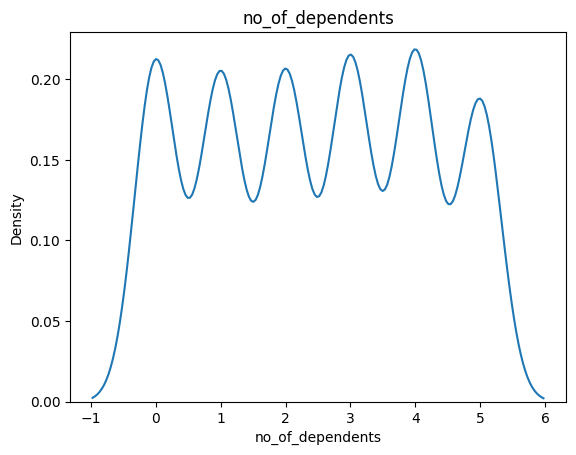

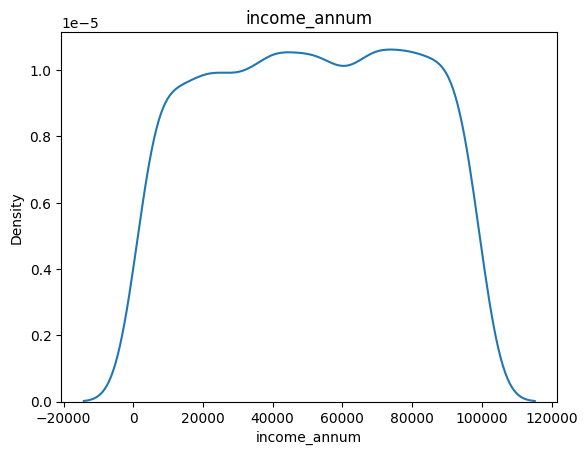

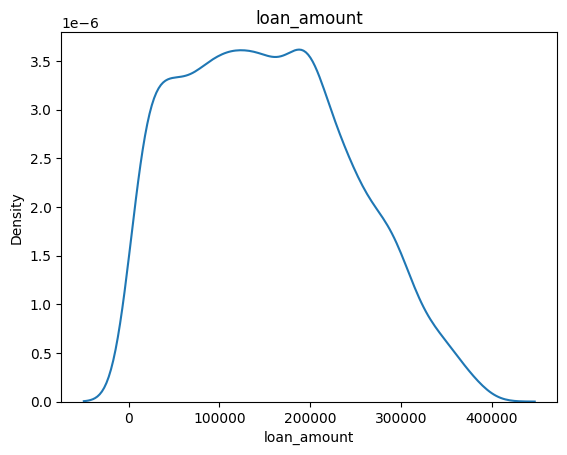

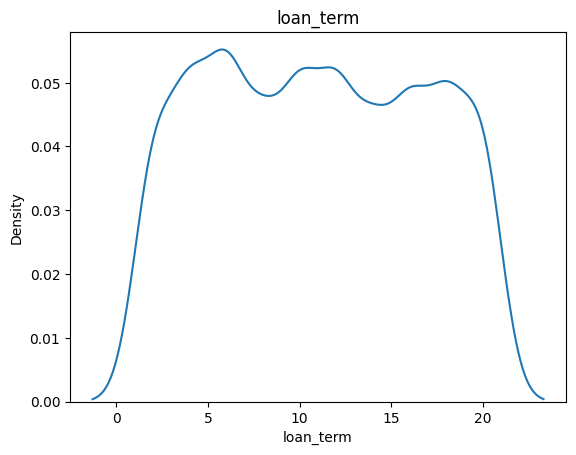

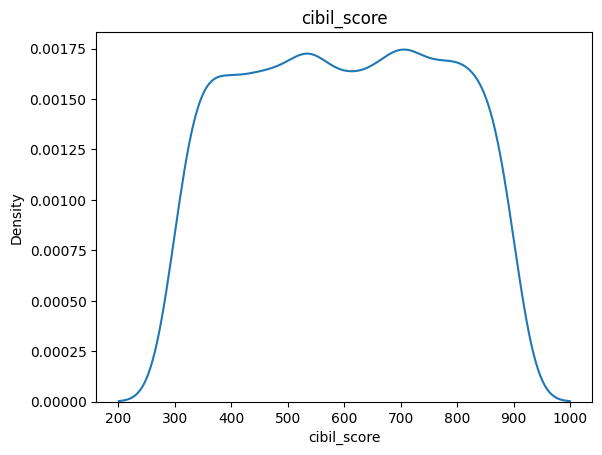

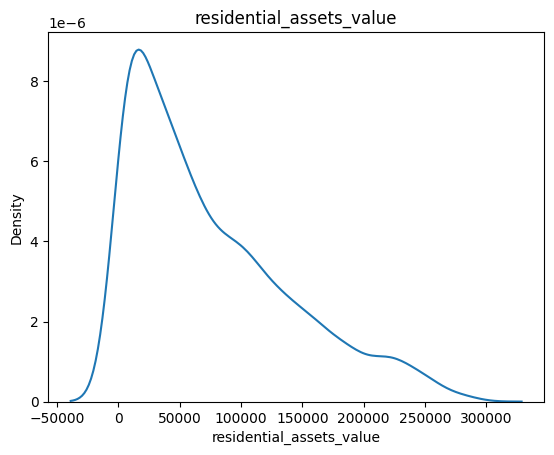

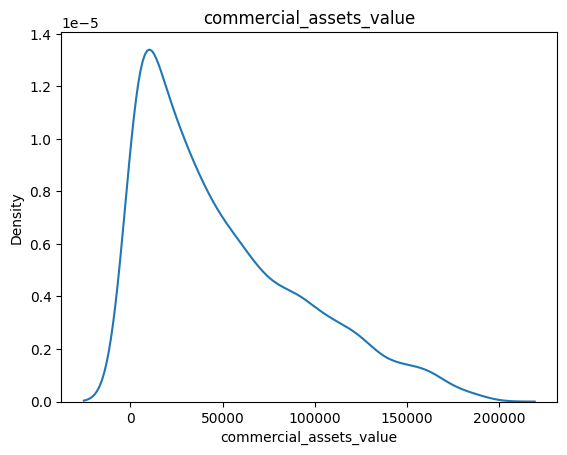

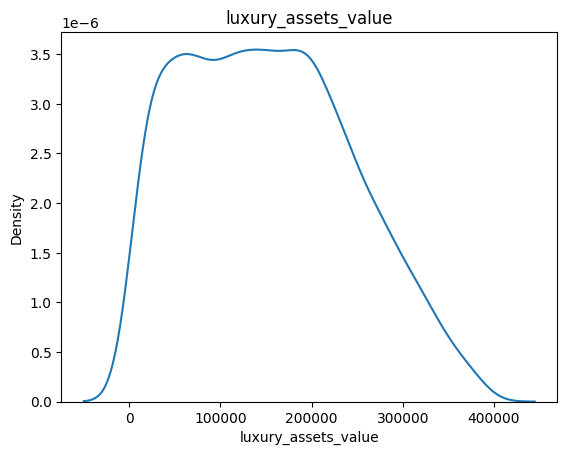

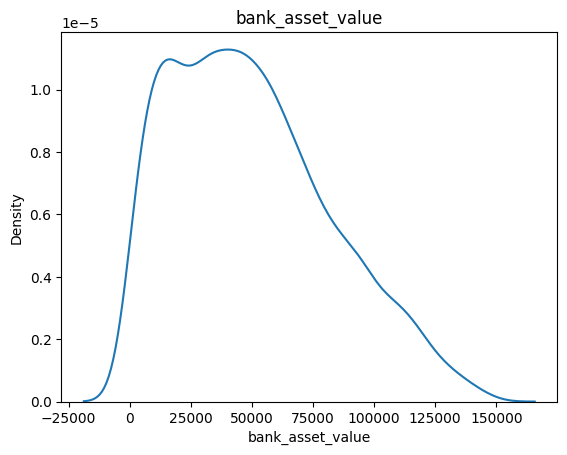

In [47]:
for col in numeric_cols:
    kdeplot(x_train[col])
    plt.title(col)
    plt.show()

In [48]:
# minMax: no_of_dependents
# log and then standard: commercial_asset_value, residential_asset_value, luxury_assests_value, bank_asset_value
# standardScaler: everything else
zscaler = StandardScaler()
mmscaler = MinMaxScaler()


x_train["no_of_dependents"] = mmscaler.fit_transform(
    x_train["no_of_dependents"].values.reshape(-1, 1)
)
dump(mmscaler, "../app/models/no_of_dependents_scaler.joblib")
x_test["no_of_dependents"] = mmscaler.transform(
    x_test["no_of_dependents"].values.reshape(-1, 1)
)

x_train["commercial_assets_value"] = np.log1p(x_train["commercial_assets_value"])
x_test["commercial_assets_value"] = np.log1p(x_test["commercial_assets_value"])
x_train["commercial_assets_value"] = zscaler.fit_transform(
    x_train["commercial_assets_value"].values.reshape(-1, 1)
)
dump(zscaler, "../app/models/commercial_assets_value_scaler.joblib")
x_test["commercial_assets_value"] = zscaler.transform(
    x_test["commercial_assets_value"].values.reshape(-1, 1)
)

x_train["residential_assets_value"] = np.log1p(x_train["residential_assets_value"])
x_test["residential_assets_value"] = np.log1p(x_test["residential_assets_value"])
x_train["residential_assets_value"] = zscaler.fit_transform(
    x_train["residential_assets_value"].values.reshape(-1, 1)
)
dump(zscaler, "../app/models/residential_assets_value_scaler.joblib")
x_test["residential_assets_value"] = zscaler.transform(
    x_test["residential_assets_value"].values.reshape(-1, 1)
)

x_train["luxury_assets_value"] = np.log1p(x_train["luxury_assets_value"])
x_test["luxury_assets_value"] = np.log1p(x_test["luxury_assets_value"])
x_train["luxury_assets_value"] = zscaler.fit_transform(
    x_train["luxury_assets_value"].values.reshape(-1, 1)
)
dump(zscaler, "../app/models/luxury_assets_value_scaler.joblib")
x_test["luxury_assets_value"] = zscaler.transform(
    x_test["luxury_assets_value"].values.reshape(-1, 1)
)

x_train["bank_asset_value"] = np.log1p(x_train["bank_asset_value"])
x_test["bank_asset_value"] = np.log1p(x_test["bank_asset_value"])
x_train["bank_asset_value"] = zscaler.fit_transform(
    x_train["bank_asset_value"].values.reshape(-1, 1)
)
dump(zscaler, "../app/models/bank_asset_value_scaler.joblib")
x_test["bank_asset_value"] = zscaler.transform(
    x_test["bank_asset_value"].values.reshape(-1, 1)
)

c:\Users\arina\miniconda3\envs\housing_env\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [49]:
mm_lss = [
    "no_of_dependents",
    "bank_asset_value",
    "commercial_assets_value",
    "residential_assets_value",
    "luxury_assets_value",
]
ss = [x for x in numeric_cols if x not in mm_lss]

for col in ss:
    x_train[col] = zscaler.fit_transform(x_train[col].values.reshape(-1, 1))
    dump(zscaler, "../app/models/" + col + "_scaler.joblib")
    x_test[col] = zscaler.transform(x_test[col].values.reshape(-1, 1))

In [50]:
ss

['income_annum', 'loan_amount', 'loan_term', 'cibil_score']

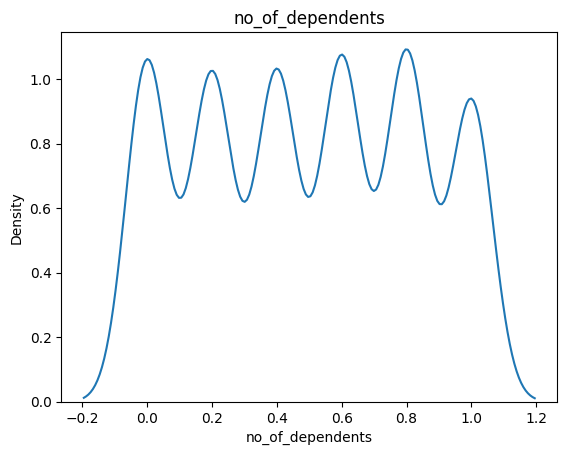

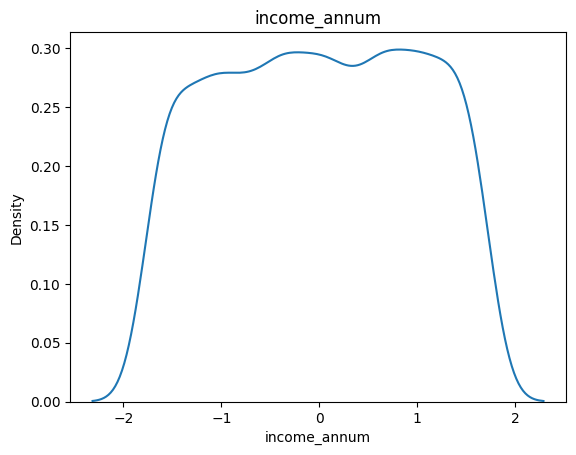

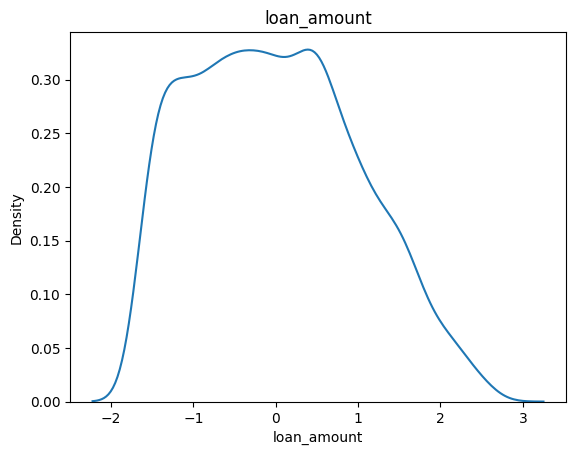

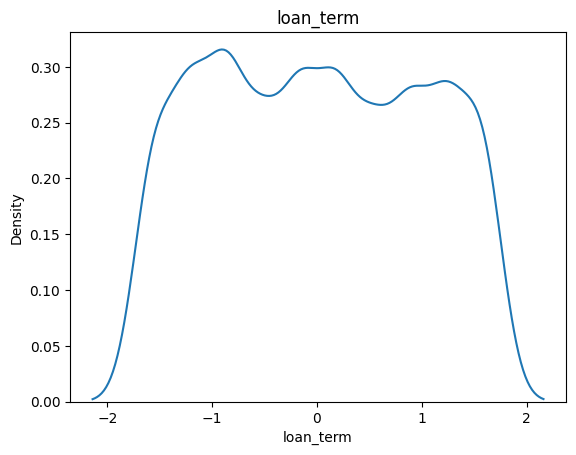

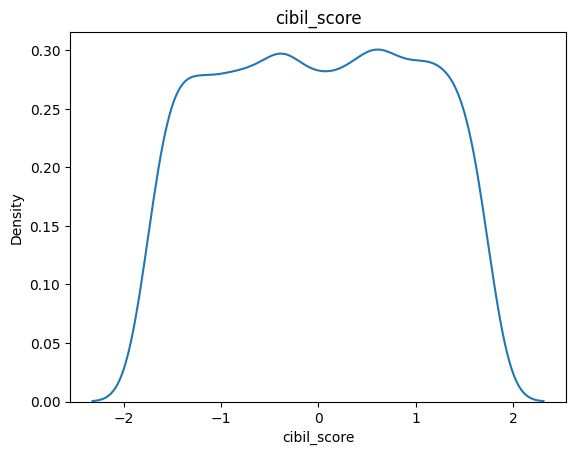

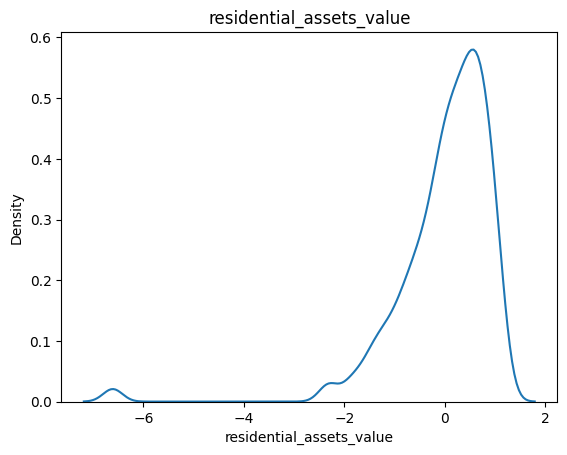

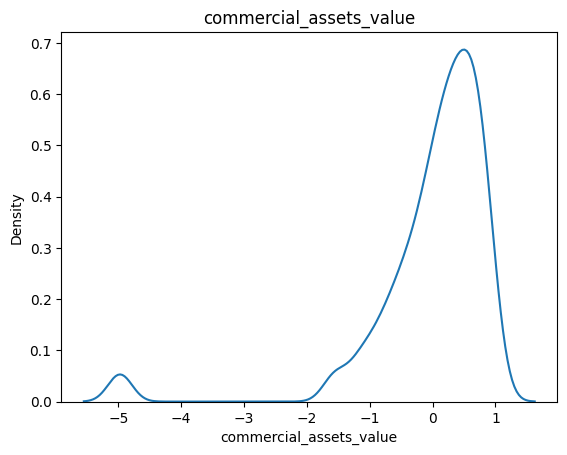

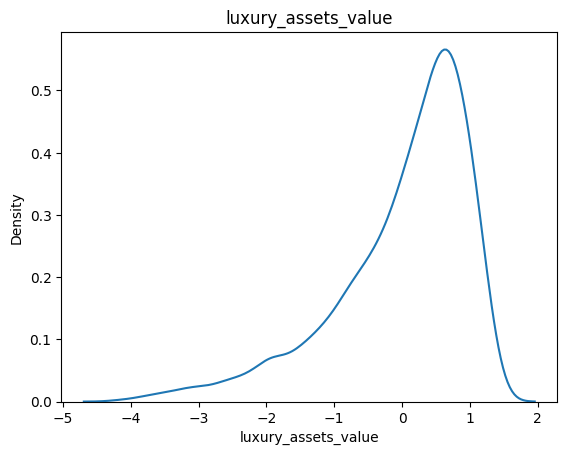

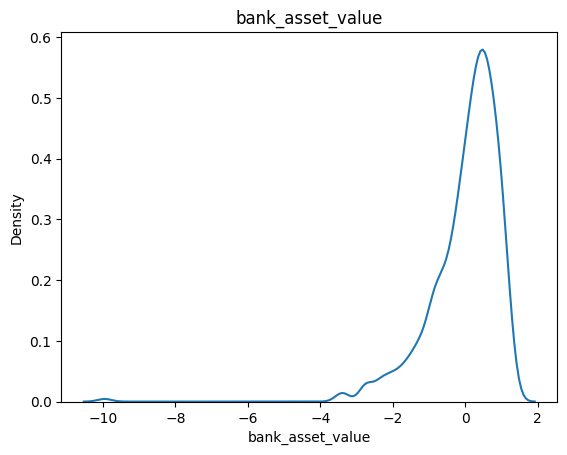

In [51]:
for col in numeric_cols:
    kdeplot(x_train[col])
    plt.title(col)
    plt.show()

# Training a model

We are going to create an XGBoost classifier


In [52]:
from xgboost import XGBClassifier

In [53]:
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb.fit(x_train.drop("loan_id", axis=1), y_train.loan_status)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [54]:
xgb.score(x_train.drop('loan_id', axis=1), y_train.loan_status)

0.9992191566892243

In [55]:
xgb.score(x_test.drop('loan_id', axis=1), y_test.loan_status)

0.9812646370023419

In [56]:
from sklearn.metrics import f1_score, confusion_matrix

# Make predictions on the test data
y_pred = xgb.predict(x_test.drop('loan_id', axis=1))

# Compute F1-score
f1 = f1_score(y_test.loan_status, y_pred)

print(f'F1-score: {f1}')

F1-score: 0.9849056603773584


In [57]:
confusion_matrix(y_test.loan_status, y_pred)

array([[158,   5],
       [  3, 261]], dtype=int64)

In [58]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test.loan_status, y_pred)

0.9789807585052984

It seems that the XGBoost Classifier is very much capable of handling this problem at the first glance.

And to be honest, we don't want to spend much time with the EDA, Feature Engineering, or the modeling.

The goal is to explore the deployment process.


In [59]:

dump(xgb, '../app/models/loan_classifier.joblib')

['../app/models/loan_classifier.joblib']

In [60]:
print(x_test.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')


In [61]:
xgb.predict(np.array(x_test.drop('loan_id', axis=1).iloc[0:1, :]))

array([0])

In [62]:
np.array(x_test.drop('loan_id', axis=1).iloc[0:1, :])


array([[ 1.        ,  1.        ,  0.        ,  0.11081052,  0.49116384,
         1.58606291, -1.03077438,  0.28504536,  0.72136972,  0.34834365,
         0.67651224]])

In [63]:
np.array(x_test.drop('loan_id', axis=1).iloc[0:1, :]).shape

(1, 11)

In [64]:
features=[
    2,
    1,
    0,
    30000,
    300000,
    15,
    625,
    0,
    0,
    0,
    7000
  ]

In [65]:
xgb.predict(np.array(features).reshape(1, -1))

array([1])

In [66]:
y_test

,loan_id,loan_status
1703,1704,0
1173,1174,1
308,309,0
1322,1323,1
3271,3272,1
...,...,...
4038,4039,0
3666,3667,1
3166,3167,1
1830,1831,1


In [67]:
np.array(x_test.iloc[0:1, :])

array([[ 1.70400000e+03,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.10810517e-01,  4.91163837e-01,
         1.58606291e+00, -1.03077438e+00,  2.85045359e-01,
         7.21369719e-01,  3.48343649e-01,  6.76512237e-01]])

In [68]:
x_test.iloc[0:1, :]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1703,1704,1.0,1,0,0.110811,0.491164,1.586063,-1.030774,0.285045,0.72137,0.348344,0.676512


In [69]:
data[data.loan_id == 1704]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1703,1704,5,1,0,54000,197000,20,423,65000,100000,157000,73000,0


In [ ]:
{
  "features": [
    5,
    1,
    0,
    54000,
    19700000,
    20,
    423,
    6500000,
    10000000,
    15700000,
    7300000
  ]
}